<a href="https://colab.research.google.com/github/ricardom98/iayaa-Equipo-52/blob/main/Actividad_Semana_9_Equipo52.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Maestría en Inteligencia Artificial Aplicada**

# **Curso: Inteligencia Artificial y Aprendizaje Automático**

Tecnológico de Monterrey
Prof Luis Eduardo Falcón Morales

# **Actividad de la Semana 9**

# **Taxonomía de Métricas de Clasificación**
**Nombres y matrículas de los integrantes del equipo:**

Sinaí Avalos Rivera A01730466

Carlos Gustavo Lopez Lerma A01793468

Ricardo Morales Bustillos A01740032

Juan Alfonso Vásquez Chapoi A00820656

Ronald David Zúniga Sánchez A01686240

# **Resumen del articulo: An experimental comparison of performance measures for classification, Pattern Recognition Letters**

En el artículo estudiado se hace un analisis sobre la semejanza y diferencia de 18 metricas (Acc, KapS, MFM, MavA, MavG, A1U, A1P, ANU, ANP, Sauc, Pauc, Mapr, MPR, MAE, MSE, LogL, CalL, CalB) para diferentes bases de datos, algunas con clases balanceadas, otras con clases desbalanceadas, algunas con un clasificador binario y otras con clasificador multiclase.

Dentro del analisis de las métricas se definen tres familias de clases, las cuales son:

* **Metricas basadas en un umbral (Treshold) y un error cuantitativo del error**

Tales como Accuracy, Accuracy promediada (aritmetica y geomerica), F-score y estadistica Kappa. Estas metricas son usadas cuando queremos reducir la cantidad de errores, ya que nos marcan una pauta entre aquellas predicciones correctas del modelo y aquellas erroneas (vp, vn, fp, fn). Si el modelo acierta lo consideramos como bueno (sin considerar que tan cerca el modelo estuvo de haberse equivocado) y si el modelo se equivoca entonces como un error. Interesante del analisis fue que determinaron cuales de estas métricas funcionan mejor para clases balanceadas y cuales para clases no balanceadas. cuales son mejores para detección de fraude o para tareas de recolección de información

* **Metricas basadas en el entendimiento probabilistico del error (como la medición de la desviación de la probabilidad real)**

Dentro de esta familia tenemos lo que es el MAE (Mean Absolute Error), el MSE (Mean Squared error), LogLoss (Cross-entropy), medidas de rankeo de probabilidad y de la calibración. Estas métricas son utiles cuando queremos ver la confiabilidad de los clasificadores; esto nos ayuda no solo a ver si un modelo se equivocó o no (como en las metricas previas) sino que tambien podemos determinar con que holgura se quedaron al momento de equivocarse (¿fue por mucho o por poco?). Esto es muy util para cuando se usa un ensamble de diferentes modelos (como el Random Forest) para realizar un ponderado correcto.

* **Metricas basadas en que tan bien el modelo rankea los ejemplos**

Dentro de esta familia tenemos las métricas que cuantifican la calidad de los rankings (separatibilidad). Son usadas para escoger las mejores instancias de un conjunto de datos o cuando una buena separación es crucial, como por ejemplo en sistemas de recomendaciones, detección de fraudes y filtrado de spam. 

AUC (Area under de Curve) que para dos clases es equivalente a la estadistica Mann–Whitney–Wilcoxon statistic y esta relacionado con el concepto de separabilidad.

Interesante dentro de los descubrimientos de los autores fue que las correlaciones entre las metricas variaba dependiendo de si el dataset era balanceado o no.

Por ejemplo, en el caso de las metricas cualitativas se descubrió que estan tienen un desempeño muy similar en el caso de conjuntos balanceado; lo cual no es verdad para conjuntos desbalanceados.

Esto último lo podemos corroborar con lo analizado durante el curso en donde hemos visto como para conjuntos desbalanceados unas métricas son mejor que otras.

A manera de conclusión es importante destacar que las métricas nos llevarán a diferentes resultados y lo que es consierado como "correcto" debe ser lo que sea mas benéfico para cada caso particular de negocio / analisis.

**Referencias**

C. Ferri, J. Hernández-Orallo, R. Modroiu, An experimental comparison of performance measures for classification, Pattern Recognition Letters, Volume 30, Issue 1, 2009, Pages 27-38.

Disponible en:

https://scholar.google.com/scholar?q=10.1016%2Fj.patrec.2008.08.010%20An%20experimental%20comparison%20of%20performance%20measures%20for%20classification%20Pattern%20recognition%20letters%202009%200167-8655%20FERRI%20C%20HERNANDEZ-ORALLO%2C%20J%20MODROIU%2C%20R%20

# **Análisis de conjunto de datos**

In [2]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from tabulate import tabulate


## **Breast Cancer Wisconsin (Diagnostic) Data Set:**


**Entendimiento del problema**

Este dataset contiene 569 registros de imágenes digitalizadas del procedimiento de aspiración con aguja fina (FNA) de la masa de pecho. Cuyo objetivo es obtener datos acerca de las células del tumor del cáncer.

El dataset se constituye por 32 columnas, 2 de 'id' y 'diagnosis', y 30 de los valores capturados de las imágenes.

La variable de salida 'y' es la columna 'diagnosis' cuya predicción era determinar si el tumor era benigno ('B') o maligno ('M'). 

Dicho estudio mostró resutlados del 97.5% de precisión utilizando validación cruzada.


In [31]:
path = 'https://raw.githubusercontent.com/Tecnologico-de-Monterrey-MNA/iayaa-Equipo-52/main/data_brast_cancer_winsconsin.csv?token=GHSAT0AAAAAABZRXSCZ4V5774MFGH2ZVOE4Y3SU4UQ'

df = pd.read_csv(path, delimiter = ',')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [32]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [36]:
# se eliminan las columnas 'id' y 'dignosis'

df_main = df.copy()
df_main.drop(['Unnamed: 32'], axis = 1)

columnas = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

df_main = df_main[columnas]

In [37]:
df_main.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


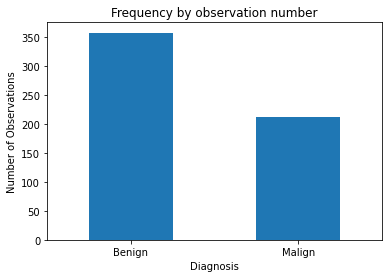

In [40]:
count_classes = pd.value_counts(df['diagnosis'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
LABELS= ['Benign','Malign']
plt.xticks(range(2), LABELS)
plt.title("Frequency by observation number")
plt.xlabel("Diagnosis")
plt.ylabel("Number of Observations");

**Determinar balanceo de clases (y.sum / y.count) en caso de dos clases.**

Vemos que de los 569 registros,  63% (357) corresponden a la clase beningno y el 37% (212) corresponden a la clase maligno.

Loa anterior nos permite concluir que las clases se encuentran moderadamente desbalanceadas. Sería recomendable utilizar técnicas de balanceo para mejorar los resultados del modelo.


**Implicaciones de un falso negativo (FN) vs un falso positivo (FP)**

Este es uno de esos casos en los que la precisión tiene que ser alta, ya que si se compromete esta métrica con el objetivo de mejorar el recall, las implicaciones pueden ser graves.

Desde la óptica de la predicción de un cáncer maligno, donde:
* VP, el modelo predijo que era maligno y realmente lo era; 
* VN, el modelo predijo que no era maligno y realmente no era; 
* FP, el modelo predijo que era maligno y realmente no era, y; 
* FN, el modelo predijo que no era maligno y sí es maligno.

Un FP para este estudio sería el mejor de los casos (aunque no bueno), en el que se le diagnostica a un paciente que tiene cáncer maligno, cuando realmente no lo es. Lo cual implicaría que haya más procedimientos, costos, etc.

Un FN es el peor de las situaciones y es el que el modelo debería de minimizar a toda costa, es aquel en el que se le diagnostica cáncer benigno, pero realmente es maligno. Esto implicaría que no se tomara el tratamiento necesario a tiempo y el cáncer se pueda propagar.

**Métrica a utilizar**

Métrica basada en umbral, tales como Accuracy, Accuracy promediada (aritmetica y geomerica), F-score o estadistica Kappa. Ya que, estas buscan reducir la cantidad de errores y nos marcan una pauta entre aquellas predicciones correctas del modelo y aquellas erroneas (vp, vn, fp, fn).

Dado que el dataset está algo desbalanceado, los resultados de las diversas métricas pueden variar, pero no será en gran medida, de igual manera es recomendable aplicar técnicas de balanceo.

## **South German Credit Data Set:**

**Determinar balanceo de clases (y.sum / y.count) en caso de dos clases.**

**En caso multiclases es necesario aplicar el metodo value_counts**

**Determinar mejores métricas y por qué (según cada caso de negocio)**

**Considera el papel de un falso negativo vs un falso positivo**

## **Telco customer churn: IBM dataset:**

**Entendimiento del problema**

Este conjunto de datos proviene de la información de una compañía de telecomunicaciones ficticia que brindó servicios telefónicos residenciales y de Internet a 7043 clientes en California en el tercer trimestre. Se incluyen varios datos demográficos importantes para cada cliente, así como una puntuación de satisfacción, una puntuación de abandono y un índice de valor de vida útil del cliente (CLTV). El Churn Score va de un valor de 0 a 100 que se calcula con base a múltiples factores que se sabe que causan abandono. Cuanto más alto sea el puntaje, más probable es que el cliente abandone. Algunas de las 33 variables que conforman este conjunto de datos son:

In [ ]:
path = 'https://raw.githubusercontent.com/Tecnologico-de-Monterrey-MNA/actividades-semanales-iayaa-SinaiAvalos/main/Copy%20of%20Telco_customer_churn.csv?token=GHSAT0AAAAAAB23PYYSQYCU4HJIUK44VM6GY3R23EA'

df = pd.read_csv(path, delimiter = ',')
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, train_test_split, RepeatedKFold, cross_validate

#Creacion de matrices con variables independientes X y variable dependiente Y 
X = df.iloc[:,0:30] 
y = df[['Churn Value']]
print(X.shape)
print(y.shape)

Xtv, Xtest, ytv, ytest = train_test_split(X, y, test_size = 0.15, random_state = 0)


(7043, 30)
(7043, 1)


Veamos de cuantas filas tenemos y cuantas hay de cada clase:

In [ ]:
print(df.shape)
print(pd.value_counts(df['Churn Value'], sort = True))

(7043, 33)
0    5174
1    1869
Name: Churn Value, dtype: int64


Vemos que son 7043 filas y solamente 1869 son la clase minoritaria con los casos de fraude. Representan el 36.12% de las muestras.

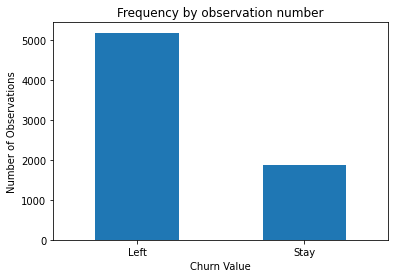

In [ ]:
count_classes = pd.value_counts(df['Churn Value'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
LABELS= ['Left','Stay']
plt.xticks(range(2), LABELS)
plt.title("Frequency by observation number")
plt.xlabel("Churn Value")
plt.ylabel("Number of Observations");

En este caso, dada la naturaleza del conjunto de datos, una propuesta de las mejores métricas para utilizar en este caso serían por ranking, puesto que este conjunto implica de cierta forma una gestión de relación con los clientes (Customer Relationship Management, CRM), ya que con los clasificadores se seleccionarían las mejores instancias del conjunto de datos.


## **Qualitative_Bankruptcy Data Set:**


**Determinar balanceo de clases (y.sum / y.count) en caso de dos clases.**

**En caso multiclases es necesario aplicar el metodo value_counts**

**Determinar mejores métricas y por qué (según cada caso de negocio)**

**Considera el papel de un falso negativo vs un falso positivo**

**Entendimiento del problema**

Este dataset contiene predicciones de bancarota de 249 bancos realizadas por expertos, con base en 7 parámetros cualitativos que fueron tomados del paper 'The discovery of experts™ decision rules from qualitative bankruptcy data using genetic algorithms' by Myoung-Jong Kim*, Ingoo Han.

E dataset cuenta con 6 variables independientes: riesgo industrial, riesgo de gestión, flexibilidad financiera, crecibilidad, competitividad y riesgo operativo. COn base en estas variables independientes, la variable dependiente Clase, establece si el banco entró en bancarota o no.

Atributos:
(P=Positive,A-Average,N-negative,B-Bankruptcy,NB-Non-Bankruptcy)

1. Industrial Risk: {P,A,N}
2. Management Risk: {P,A,N}
3. Financial Flexibility: {P,A,N}
4. Credibility: {P,A,N}
5. Competitiveness: {P,A,N}
6. Operating Risk: {P,A,N}
7. Class: {B,NB}

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from tabulate import tabulate

In [ ]:
path = 'https://raw.githubusercontent.com/Tecnologico-de-Monterrey-MNA/iayaa-Equipo-52/main/Qualitative_Bankruptcy.data.txt?token=GHSAT0AAAAAAB3ESJAVXMZJE5YARZHLT4Y2Y3SAWFA'

df = pd.read_csv(path, delimiter = ',')
df

,P,P.1,A,A.1,A.2,P.2,NB
0,N,N,A,A,A,N,NB
1,A,A,A,A,A,A,NB
2,P,P,P,P,P,P,NB
3,N,N,P,P,P,N,NB
4,A,A,P,P,P,A,NB
...,...,...,...,...,...,...,...
244,N,N,A,N,N,N,B
245,P,N,N,N,N,N,B
246,A,N,N,N,N,N,B
247,N,N,N,N,N,N,B


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   P       249 non-null    object
 1   P.1     249 non-null    object
 2   A       249 non-null    object
 3   A.1     249 non-null    object
 4   A.2     249 non-null    object
 5   P.2     249 non-null    object
 6   NB      249 non-null    object
dtypes: object(7)
memory usage: 13.7+ KB


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, train_test_split, RepeatedKFold, cross_validate

#Creacion de matrices con variables independientes X y variable dependiente Y 
X = dfb.iloc[:,0:6] 
y = dfb[['NB']]
print(X.shape)
print(y.shape)

Xtv, Xtest, ytv, ytest = train_test_split(X, y, test_size = 0.15, random_state = 0)

(249, 6)
(249, 1)


Veamos de cuantas filas tenemos y cuantas hay de cada clase:

In [ ]:
print(df.shape)
print(pd.value_counts(df['NB'], sort = True))

(249, 7)
NB    142
B     107
Name: NB, dtype: int64


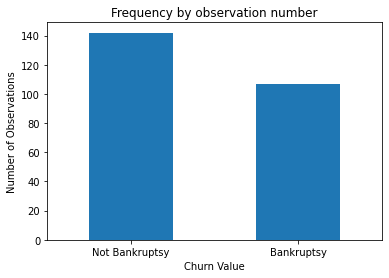

In [ ]:
count_classes = pd.value_counts(df['NB'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
LABELS= ['Not Bankruptsy','Bankruptsy']
plt.xticks(range(2), LABELS)
plt.title("Frequency by observation number")
plt.xlabel("Churn Value")
plt.ylabel("Number of Observations");

**Justificación respecto a si el problema requiere aplicar técnicas de balanceo de clases**

Vemos que de los 249 registros, el 57% (142) corresponden a la clase no bancarrota y el 43% (107) corresponden a la clase bancarrota.

Lo anterior nos permite concluir que las clases se encuentran balanceadas.

**Análisis de las implicaciones que conllevan los FN y los FP**

Respecto a los errores, lo ideal es que los falsos negativos sean verdaderos negativos y los falsos positivos sean verdaderos positivos.

Ahora bien, partiendo de que en el campo NB, positivo significa No Bancarrota y negativo significa Bancarrota, en cuanto a las implicaciones de los Falsos Negativos (FN) y los Falsos positivos (FP), concluímos que:

Un FN significa que el modelo de forma errónea predijo que un banco X iba a entrar en bancarrota. Dicha predicción resulta nefasta para el banco mal categorizado, puesto que alarmará y generará una pérdida de confianza en los grupos de interés, en especial a los acreedores, entes de control, accionistas, empleados y clientes. Esta pérdida de confianza puede llevar al banco a una crisis que desencadene en una verdadera bancarrota, dadas sus dificultades para mantener o solicitar apoyos financieros y a la salida apresurada de los ahorros de sus clientes. 

Un FP es igual de indeseable que un FN, ya que significa que el modelo de forma errónea predijo que un banco X no iba a entrar en bancarrota cuando en realidad si iba a estarlo en el corto plazo. Esta situación genera una falsa tranquilidad en sus grupos de interés e inclusive en los directivos del banco, la cual puede llevar a que no se tomen oportunamente las medidas correspondientes tanto en procura de salvar el banco como de proteger los capitales de parte de ahorradores, acreedores e inversionistas. 

**Métrica a utilizar**

En este caso lo más recomendable es usar una métrica basada en umbral, tales como Accuracy, Accuracy promediada (aritmetica y geomerica), F-score o estadistica Kappa. Lo anterior puesto que estas metricas son bastante útiles para reducir la cantidad de errores, ya que nos marcan una pauta entre aquellas predicciones correctas del modelo y aquellas erroneas (vp, vn, fp, fn).

De igual forma, dado que nuestro dataset es de variables cualitativas y la clase se encuentra balanceada, como menciona el paper "Pattern Recognition Letters", los resultados de estas métricas sería muy similares, por lo cual su diferencia no es significativa.

Considerando que el dataset tiene tan solo 249 registros, es conveniente utilizar las métricas mencionadas junto con la métrica de Área bajo la curva de ROC (AUC), la cual es útil para obtener más información con menos datos.